Problem 1

In [1]:
import numpy as np
from numpy.linalg import inv
from pyDOE import lhs
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
class BayesianLinearRegression:
    def __init__(self, x, y, alpha = 5, beta = 0.1):
        self.x = x
        self.y = y
        self.alpha = alpha
        self.beta = beta
        self.eta = 1e-8
        
    def MLE(self):
        xT_x_inv = inv(np.matmul(self.x.T, self.x) + self.eta)
        xT_y = np.matmul(self.x.T, self.y)
        self.w_MLE = np.matmul(xT_x_inv, xT_y)
        return self.w_MLE
    
    def MAP(self):
        Lambda = np.matmul(self.x.T,self.x) + (self.beta/self.alpha)*np.eye(self.x.shape[1])
        Lambda_inv = inv(Lambda)
        xT_y = np.matmul(self.x.T, self.y)
        mu = np.matmul(Lambda_inv, xT_y)
        self.w_MAP = mu
        self.Lambda_inv = Lambda_inv
        return mu, Lambda_inv
    
    def p(self, x_star):
        mean_star = np.matmul(x_star, self.w_MAP)
        var_star = 1.0/self.alpha + np.matmul(x_star, np.matmul(self.Lambda_inv, x_star.T))
        return mean_star, var_star
        

In [3]:
class Features:
    def __init__(self, x, N, M):
        self.x = x
        self.M = M
        self.N = N
        
    def iden(self, x):
        return x
    
    def mono(self, x,M):
        N = x.shape[0]
        M = M + 1
        output = np.zeros((N,M))
        for i in range(M):
            output[:,i:i+1] = x ** i
        return output 
    
    def four(self, x,M):
        N = x.shape[0]
        output = np.zeros((N,2*M))
        for i in range(M):
            output[:,2*i:2*i+1] = np.sin(i*np.pi*x)
            output[:,2*i+1:2*i+2] = np.cos(i*np.pi*x)
        return output   
    
    def legendre(self, x, M):
        N = x.shape[0]
        output = np.zeros((N,M))
        for i in range(M):
            infer = np.polynomial.legendre.Legendre.basis(i, [0, 2.])
            output[:,i:i+1] = infer(x)
        return output    
  

(500, 1)
(500, 500)
(100, 500)


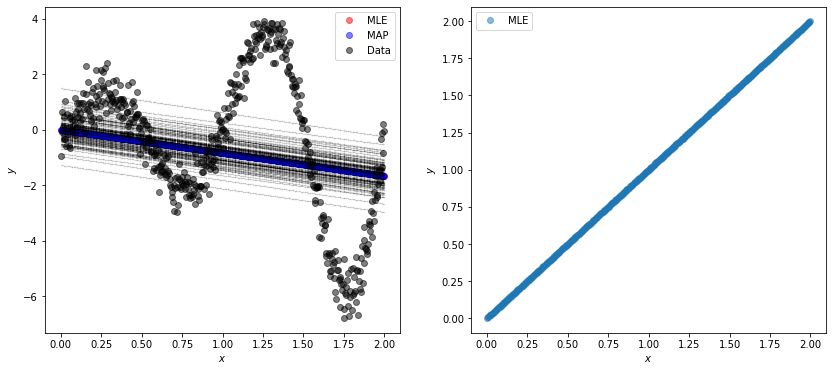

In [4]:
N = 500
M = 8
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


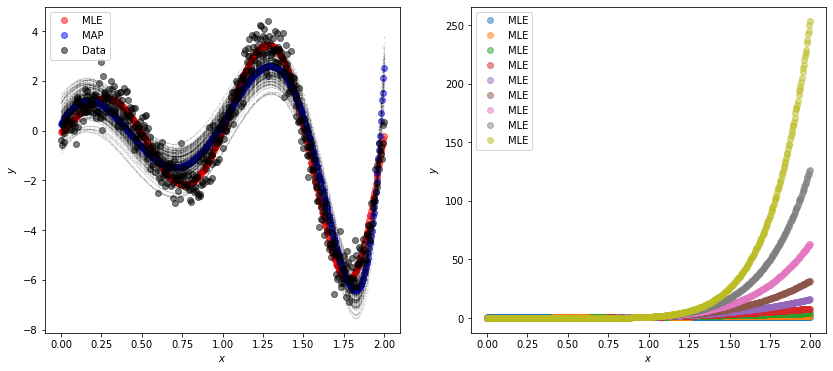

In [5]:
N = 500
M = 8
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


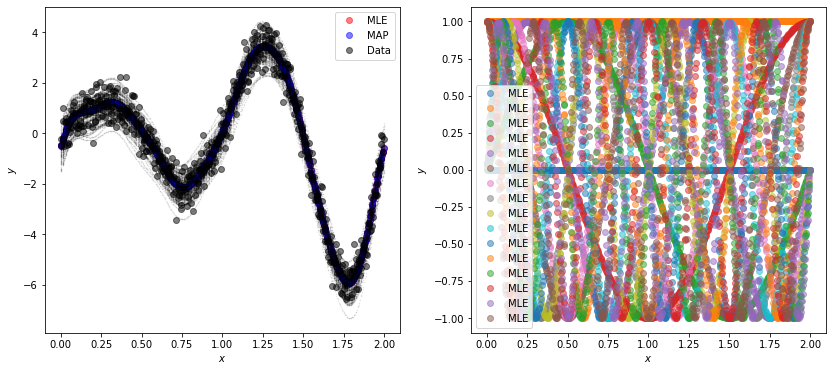

In [6]:
N = 500
M = 8
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


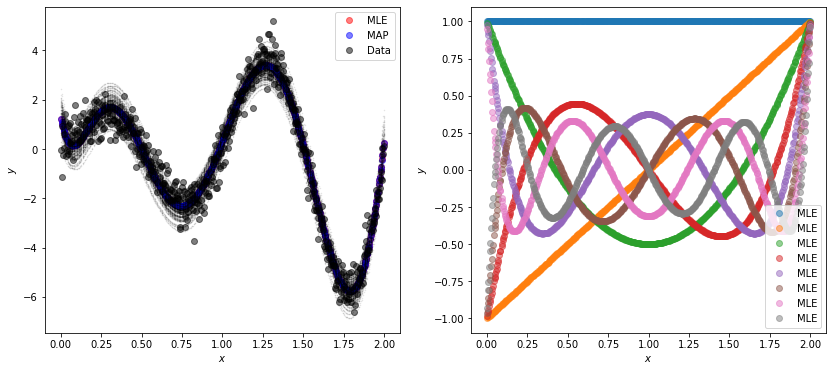

In [18]:
N = 500
M = 8
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


Try M = 500, N =4

(500, 1)
(500, 500)
(100, 500)


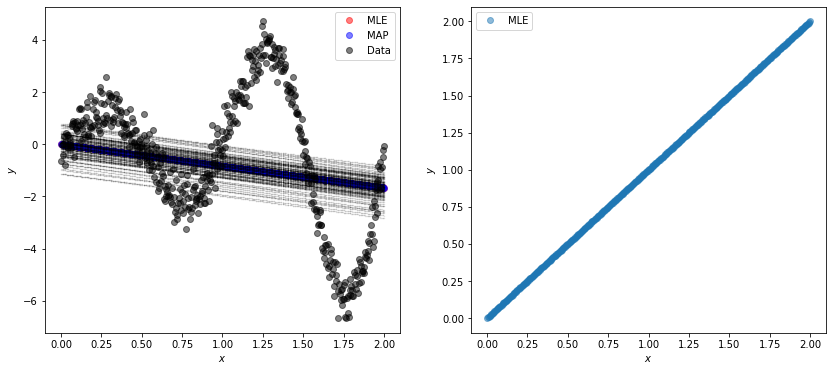

In [8]:
N = 500
M = 4
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


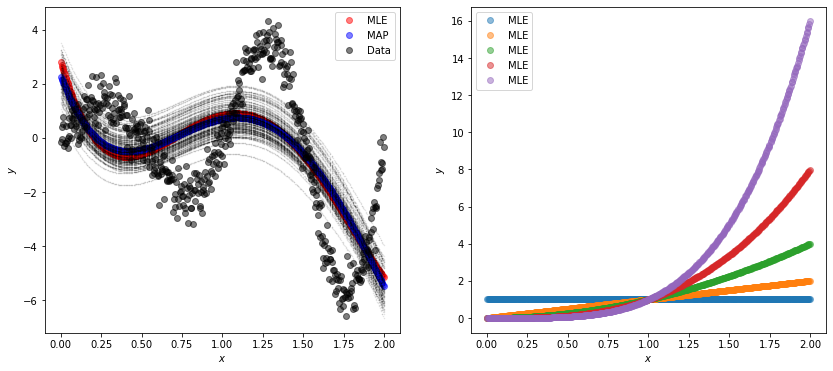

In [19]:
N = 500
M = 4
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


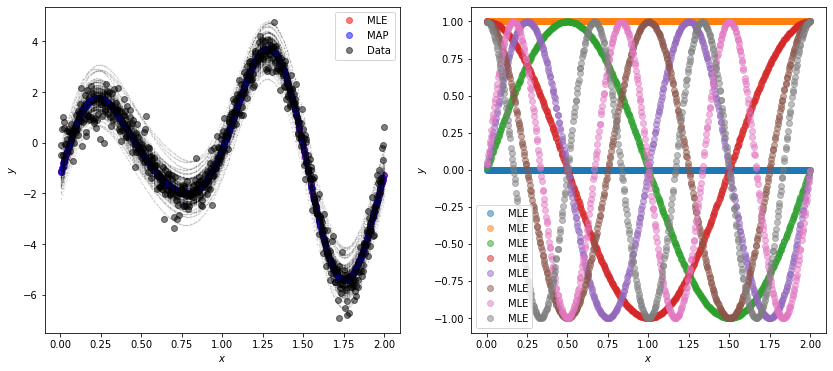

In [20]:
N = 500
M = 4
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


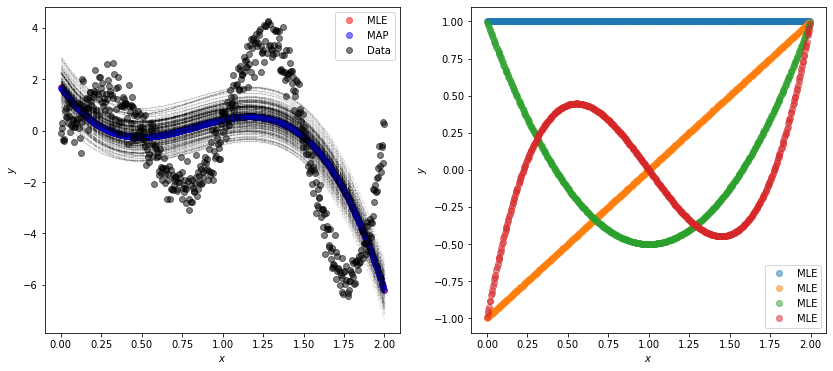

In [21]:
N = 500
M = 4
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


Then we try another M for fourier basis

(500, 1)
(500, 500)
(100, 500)


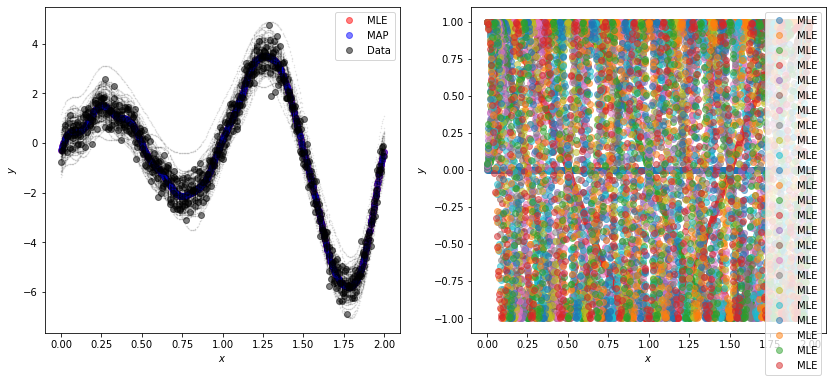

In [27]:
N = 500
M = 12
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


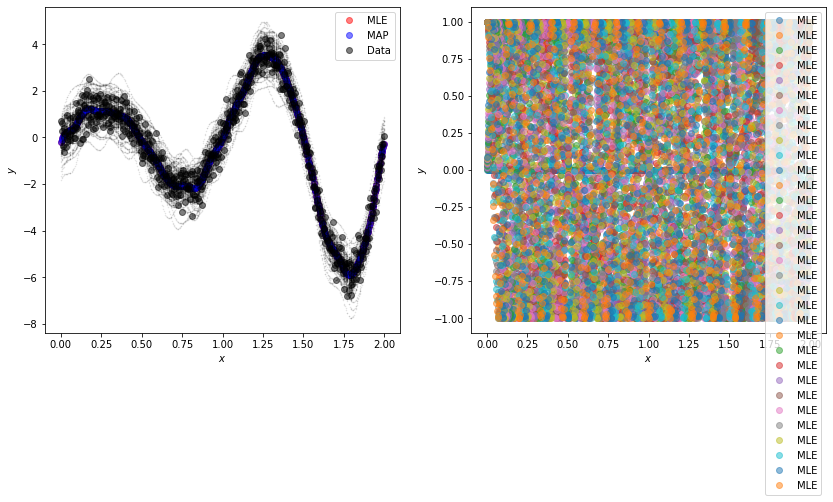

In [29]:
N = 500
M = 16
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


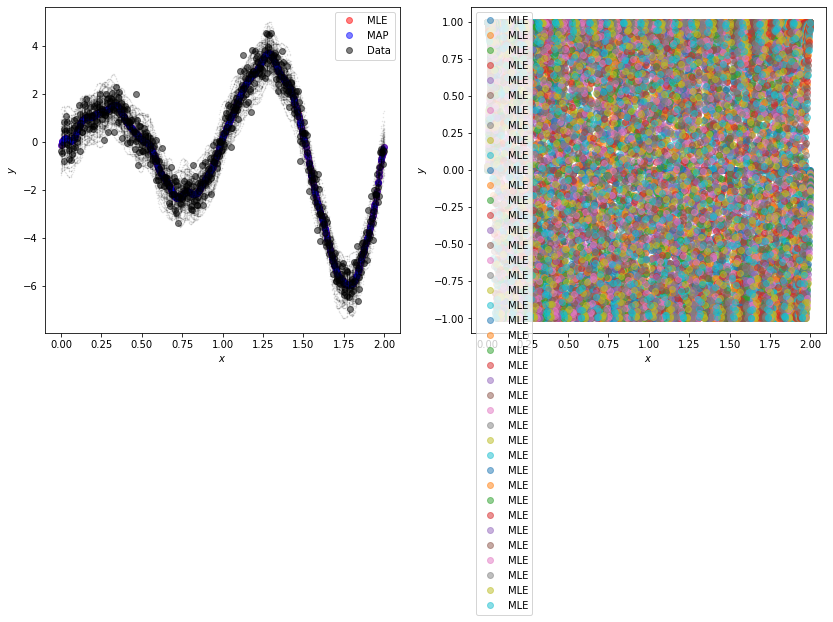

In [30]:
N = 500
M = 20
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


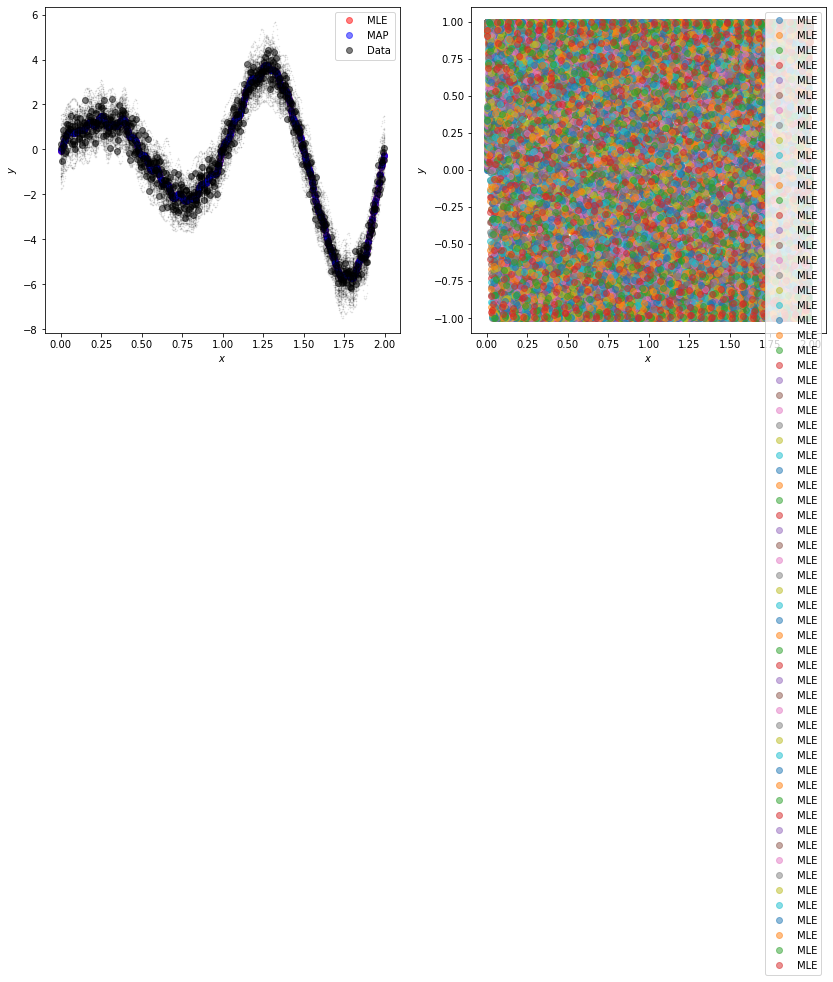

In [31]:
N = 500
M = 32
alpha = 5
beta = 0.1

# Create random input and output data
x = 2 * lhs(1, N)

x = np.sort(x)
y = np.exp(x) * np.sin(2*np.pi*x) + 0.5*np.random.randn(N,1)

f = Features(x, N, M)

x_1 = f.iden(x)
x_2 = f.mono(x, M)
x_3 = f.four(x, M)
x_4 = f.legendre(x, M)

X_input = x_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.MLE()
w_MAP, Lambda_inv = m.MAP()


# Predict at a set of test points
X_star = x
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.p(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(x,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(x, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


Conclusion：


This question is trying to find out the relationship between the number of features and the number of samples, as well as the difference between four different representation of features. When N=500, M=4 or 8, we could easily find that for basis representation, the models all tend to underfit. Even for monomial representation, the accuracies tend to be better but still a little bit ubderfit, especially when the number of feature is small(e.g. 4). The same problem appeared in Legendre basis. The only one which is both suitable and good for both M=4 and M=8 is Fourier basis. This function is constructed by sin and cos functions of different frequencies, thus the Fourier basis is the one that will provide the best results due to its ability to approximate periodic functions. Then by increasing the number of features I want to find out the best number for this feature. In order to approximate all the riding waves of the signal one need to use at least M=12 or M = 16, to capture the wave of the maximum frequency.

Problem 2 

(1) & (2)

In [77]:
import numpy as np
from pyDOE import *
import matplotlib.pyplot as plt
from numpy.linalg import *

# initialize x
N = 1000
x = np.full((N,2),1.1) # can't use 0 here since we should avoid singular matrix
uni = np.random.uniform(-1,1,N) 
x.T[0] = uni  # for alpha
x.T[1] = np.full((N,),1)  # for beta
# initialize w
w = np.array([[5],[1]]) # for convenience, combine alpha and beta into w
y = np.dot(x,w) # true data result 
# initialize noise
n = np.random.normal(loc=0,scale=1,size=N)

print(n.shape, y.shape)

n = n[:,None] # change array to 1d matrix so that we could do y+n

print(n.shape)
y = y+n

#initialize parameters
alpha = 0.5
beta = 0.5

(1000,) (1000, 1)
(1000, 1)


(100,) (100,) (100, 100)
(1000, 1)
(1000,)


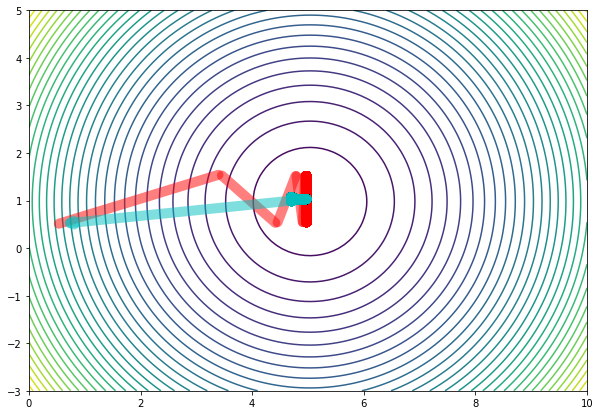

In [78]:
plt.figure(figsize=(10,7))
alpha_lst = np.linspace(0,10,100)
beta_lst = np.linspace(-3,5,100)
cost_grid = np.ones((100,100)) 
print(alpha_lst.shape, beta_lst.shape, cost_grid.shape)


for i in range(100):
    for j in range(100):
        cost_grid[i][j] = np.average((y.flatten() - (alpha_lst[i]*x.T[0]+beta_lst[j]))**2)

print(y.shape)
print(y.flatten().shape)

# draw the backgroud plot
alpha_grid, beta_grid = np.meshgrid(alpha_lst,beta_lst) 
plt.contour(alpha_grid,beta_grid,cost_grid,30)

# draw the gradient descent to find alpha and beta
learning_rate = 0.002
lst_alpha = [] # list of alpha for every step
lst_beta = [] # list of beta for every step
w_new = np.array([[0.5],[0.5]]) # maintain the latest value of the parameter after every update
lst_alpha.append(0.5) # add nitial alpha
lst_beta.append(0.5) # add initial beta

i =0
while i<1000 :   
    w_new = w_new - learning_rate*(np.dot(np.dot(x.T,x),w_new) - np.dot(x.T,y)) # w_n+1 = w_n - eta * [(x^T x w_n) - (x^T y)]  
    lst_alpha.append(w_new[0][0])
    lst_beta.append(w_new[1][0])
    i = i+1

# print(lst_alpha[0:5], lst_beta[0:5])
for j in range(1000): 
    plt.annotate('', xy=(lst_alpha[j],lst_beta[j]), xytext=(lst_alpha[j+1],lst_beta[j+1]),arrowprops={'arrowstyle': '-', 'color': 'r', 'lw': 10,'alpha':0.5},
va='center', ha='center')

# for newton method  
lst_alpha_newton = []
lst_beta_newton = []
w_newton = np.array([[0.5],[0.5]]) # store latest w
lst_alpha_newton.append(0.5)
lst_beta_newton.append(0.5)

i =0
while i<1000 :   
    w_newton = w_newton - np.dot(np.linalg.inv(np.dot(x.T,x)),(np.dot(np.dot(x.T,x),w_newton) - np.dot(x.T,y)))
    # w_n+1 = w_n -(x^T x)^-1 [x^T x w_n - x^T y]
    lst_alpha_newton.append(w_newton[0][0])
    lst_beta_newton.append(w_newton[1][0])
    i = i+1


for j in range(1000):
    plt.annotate('', xy=(lst_alpha_newton[j],lst_beta_newton[j]), xytext=(lst_alpha_newton[j+1],lst_beta_newton[j+1]),arrowprops={'arrowstyle': '->', 'color': 'c', 'lw': 10,'alpha':0.5},
va='center', ha='center')  

alpha and beta, from the result below, we could easily find that newton method is quicker than gradient descent to be close to the actual value 

In [79]:
w_new # for gradient descent

array([[4.97432864],
       [0.5037481 ]])

In [80]:
w_newton # for newton method

array([[4.97380613],
       [1.02960297]])

In [98]:
np.dot(np.dot(x.T,x),w_new) - np.dot(x.T,y)

array([[ 5.22502411e-01],
       [-5.25855219e+02]])

In [99]:
np.dot(np.dot(x.T,x),w_newton) - np.dot(x.T,y)

array([[2.27373675e-13],
       [0.00000000e+00]])

(3) \begin{equation*}
    -E(\nabla_\theta^2 log P(x|\theta))
\end{equation*}
\begin{equation*}
    =-E(\frac{H_\theta(P(x|\theta)}{P(x|\theta)}-\nabla_\theta log P(x|\theta)(\nabla_\theta log P(x|\theta))^T
\end{equation*}
\begin{equation*}
    =F-\int H_\theta P(x|\theta) dx = F-H_\theta(1) = F
\end{equation*}

(4) \begin{equation*}
    \nabla_\theta^2 log P(x|\theta) = \nabla_\theta(\nabla_\theta log(x|\theta)) 
\end{equation*}
\begin{equation*}
    = \frac{\nabla_\theta(\nabla_\theta P(x|\theta))P(x|\theta)-\nabla_\theta P(x|\theta)(\nabla_\theta P(x|\theta))^T}{P(x|\theta)P(x|\theta)}
\end{equation*}
\begin{equation*}
    \frac{H_\theta P(x|\theta)}{P(x|\theta)}-\nabla_\theta log(P|\theta){\frac{\nabla_\theta P(x|\theta)}{P(x|\theta)}}^T
\end{equation*}
\begin{equation*}
    = \frac{H_\theta P(x|\theta)}{ P(x|\theta)} - \nabla_\theta log P(x|\theta)(\nabla_\theta log P(x|\theta))^T
\end{equation*}



(5)

(100, 2)


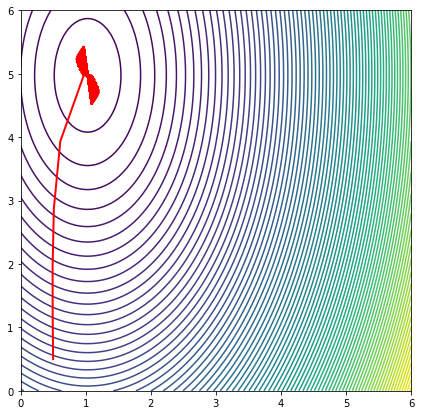

In [93]:
# for natural gradient descent rule
lst_alpha_natural = []
lst_beta_natural = []
theta = np.array([[0.5],[0.5]]) # store latest w
theta_dis = np.zeros((100,2))
lst_alpha_natural.append(0.5)
lst_beta_natural.append(0.5)

# for f 
def f(x, y, theta):
    m = len(y)
    fisher = np.zeros((2,2))
    for i in range(m):
        x_i = x[i, :].T
        x_i.shape = (1,2)
        
        grad = np.dot(x_i.T, np.dot(x_i, theta)-y[i])
        grad.shape = (2,1)
        fisher = fisher + np.dot(grad, grad.T)
 
    fisher = fisher/m
    
    return fisher


i =0
while i<100 :   
    F = f(x,y,theta)
  
    theta_dis[i] = (theta[1], theta[0])
    theta = theta - learning_rate * np.dot(np.linalg.inv(F),(np.dot(x.T,(np.dot(x,theta)-y))))
    
    lst_alpha_natural.append(theta[0][0])
    lst_beta_natural.append(theta[1][0])
    i = i+1
print(theta_dis.shape)
plt.figure(figsize=(7,7))
alpha_lst = np.linspace(0,6,100)
beta_lst = np.linspace(0,6,100)
cost_grid = np.ones((100,100)) 

for i in range(100):
    for j in range(100):
        cost_grid[i][j] =np.average((y.flatten() - (alpha_lst[i]*x.T[0]+beta_lst[j]))**2)
plt.contour(alpha_lst, beta_lst, cost_grid, 100, cmap = 'viridis')

plt.plot(theta_dis[:, 0], theta_dis[:,1], color = 'red', linewidth = 2)



In [95]:
theta

array([[4.52852374],
       [1.09208831]])

In [97]:
np.dot(np.dot(x.T,x),theta) - np.dot(x.T,y)

array([[-145.92424714],
       [  62.78283026]])

Problem 3

（1) For convenience, we use Y to represent y
\begin{equation*}
    P(\alpha|x,Y,\beta,\gamma) \propto  P(Y|x,\alpha,\beta,\gamma)P(\alpha)= e^{-\frac{\gamma}{2}(Y^T - \alpha x^T -\beta^T)-\frac{1}{2}\alpha^T \sum ^{-1}\alpha}
\end{equation*}

\begin{equation*}
    = e^{-\frac{\gamma}{2}(Y^T Y - 2Y^T \beta -2 Y^T x \alpha + 2 \beta ^T x \alpha + \alpha ^T x^T x \alpha + \beta ^T \beta) - \frac{1}{2}\alpha^T \sum ^{-1} \alpha}
\end{equation*}
Assume Gaussian distribution: N($\mu$,$\sum$)

Quadratic derivation: 
\begin{equation*}
    \frac{-1}{2} (\alpha ^T (\gamma x^T x + \sum ^{-1})\alpha)
\end{equation*}
Linear term:
\begin{equation*}
     \gamma (Y^T x\alpha -\beta ^T x \alpha) = \gamma ( Y^Tx - \beta^T x)\alpha
\end{equation*}

Because the symmetry of $\sum ^{-1}$
\begin{equation*}
    \mu_\alpha \sum ^{-1}= \gamma ( Y^T x - \beta ^T x)
\end{equation*}
Therefore, we have
\begin{equation*}
    \mu _\alpha = \gamma (Y^T x -\beta ^T x)(\sum ^{-1})^{-1}
\end{equation*}
\begin{equation*}
    \sum ^{-1} = (\gamma x ^T x + \sum ^{-1}) = \gamma \sum_{-1}^{n}{x_i}^2+1
\end{equation*}
($\sum ^{-1}$ here is the inverse of $\sum$)

Then we have:
\begin{equation*}
    \sum = (\gamma \sum_{i=1}^n {x_i}^2+1)^{-1}
\end{equation*}
\begin{equation*}
    \mu_\alpha = \gamma(\sum_{i=1}^n Y_i x_i -\beta \sum_{i=1}^n x_i)(\gamma \sum_{i=1}^n {x_i}^2+1)^{-1}
\end{equation*}


(2) Similar as (1)

Quadratic derivation: 
\begin{equation*}
    \frac{-1}{2} (\beta ^T (\gamma + \sum ^{-1})\beta)
\end{equation*}
Linear term:
\begin{equation*}
     \gamma (Y^T  -\alpha ^T x  ^T)\beta 
\end{equation*}


Then
\begin{equation*}
    \mu \sum ^{-1} = \gamma(Y^T -\alpha^T x^T)\beta
\end{equation*}
\begin{equation*}
    \sum^{-1} = \gamma + 1
\end{equation*}
\begin{equation*}
    \sum= (\gamma + 1)^{-1}
\end{equation*}
\begin{equation*}
    \mu = \gamma(Y^T \beta-\alpha^T x^T \beta)(\gamma+1)^{-1}= \gamma \beta(\sum_{i=1}^n y_i-\alpha^T \sum_{i=1}^n x_i(\gamma +1)^{-1})
\end{equation*}

(3)
\begin{equation*}
    P(\gamma) = Gam(2,1) = Gam(\alpha, \beta)
\end{equation*}


Because, $p(\gamma)$ ~ $\Gamma(2,1)$ 


\begin{equation*}
    P(\gamma|x,Y,\beta,\alpha) \propto  P(Y|x,\alpha,\beta,\gamma)P(\gamma)= e^{-\frac{\gamma}{2}(Y^T - \alpha x^T -\beta^T)-\frac{1}{2}\gamma^T \sum ^{-1}\gamma}
\end{equation*}

\begin{equation*}
    = e^{-\frac{\gamma}{2}(Y^T Y - 2Y^T \beta -2 Y^T x \alpha + 2 \beta ^T x \alpha + \alpha ^T x^T x \alpha + \beta ^T \beta) - \frac{1}{2}\alpha^T \sum ^{-1} \alpha}
\end{equation*}

Assume Gamma distribution: $\Gamma$($\mu$,$\sum$)

\begin{equation*}
    P(r) \propto \frac{r^{\frac{1}{2}n+1}}{((2\pi)^{\frac{n}{2}}}e^{-\frac{\gamma}{2}(\gamma - \alpha^Tx^T-\beta^T)(Y-x\alpha-\beta)-\gamma}
\end{equation*}

\begin{equation*}
    \mu = k* \theta = (2+1)\times 1=3, \beta = \frac{1}{\theta}=1 , \theta=1
\end{equation*}

Similar with (1) and (2). After finding the quadratic derivation and linear derivation, we could easily get:

\begin{equation*}
    \sum= \frac{\gamma \sum_{i=1}^n||y_i-x_i\alpha-\beta||_2^2+2}{2}
\end{equation*}